# Notebook de mejora

Este notebook es un ejemplo cómo se puede mejorar los hiperparámetros de un algoritmo, y medir la importancia de atributos https://www.kaggle.com/c/house-prices-advanced-regression-techniques/ de la práctica 3 de Inteligencia de Negocio. 

Incluyo el código del notebook anterior, no se explicarán.

Es un ejemplo que es claramente mejorable, se deja a el/la estudiante el mejorarlo para obtener mejores resultados.

In [1]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler


Cambiamos preprocesamiento, lo hacemos con los dos conjuntos juntos.

In [2]:
import pandas as pd
import numpy as np

train = pd.read_csv("train.csv", na_values="NaN") # Definimos na_values para identificar bien los valores perdidos

if 'Id' in train:
    train.drop('Id', axis=1, inplace=True)

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

test = pd.read_csv("test.csv", na_values="NaN")
test_ids = test.Id
test = test.drop('Id', axis=1)



In [3]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


SPECIAL NOTES:
There are 5 observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will indicate them quickly). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these 5 unusual observations) before assigning it to students.

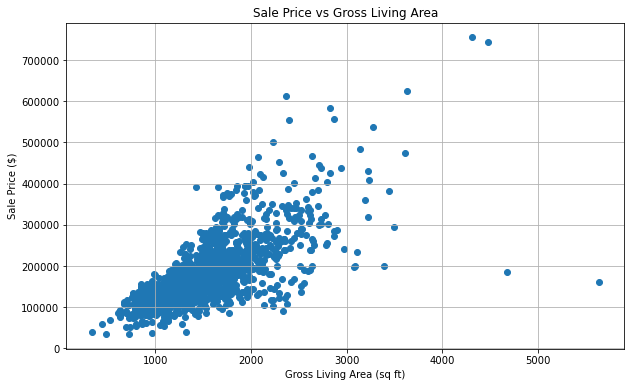

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(train["GrLivArea"], train["SalePrice"])
plt.title("Sale Price vs Gross Living Area")
plt.xlabel("Gross Living Area (sq ft)")
plt.ylabel("Sale Price ($)")
plt.grid(True)
plt.show()

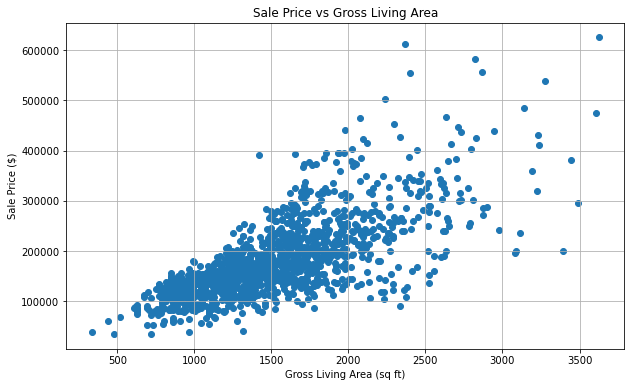

In [6]:
train = train[train["GrLivArea"] <= 4000]
plt.figure(figsize=(10, 6))
plt.scatter(train["GrLivArea"], train["SalePrice"])
plt.title("Sale Price vs Gross Living Area")
plt.xlabel("Gross Living Area (sq ft)")
plt.ylabel("Sale Price ($)")
plt.grid(True)
plt.show()

Vamos a tratar los valores perdidos

In [7]:
# Calcular el porcentaje de valores perdidos en el conjunto de entrenamiento
train_missing_percent = (train.isnull().sum() / len(train)) * 100

# Calcular el porcentaje de valores perdidos en el conjunto de prueba
test_missing_percent = (test.isnull().sum() / len(test)) * 100

# Filtrar las variables con porcentaje mayor que 0 en el conjunto de entrenamiento
train_missing_variables = train_missing_percent[train_missing_percent > 0]

# Filtrar las variables con porcentaje mayor que 0 en el conjunto de prueba
test_missing_variables = test_missing_percent[test_missing_percent > 0]

# Mostrar el porcentaje de valores perdidos en cada variable
print("Porcentaje de valores perdidos en el conjunto de entrenamiento:")
print(train_missing_variables)

print("\nPorcentaje de valores perdidos en el conjunto de prueba:")
print(test_missing_variables)

Porcentaje de valores perdidos en el conjunto de entrenamiento:
LotFrontage     17.788462
Alley           93.750000
MasVnrType       0.549451
MasVnrArea       0.549451
BsmtQual         2.541209
BsmtCond         2.541209
BsmtExposure     2.609890
BsmtFinType1     2.541209
BsmtFinType2     2.609890
Electrical       0.068681
FireplaceQu     47.390110
GarageType       5.563187
GarageYrBlt      5.563187
GarageFinish     5.563187
GarageQual       5.563187
GarageCond       5.563187
PoolQC          99.656593
Fence           80.769231
MiscFeature     96.291209
dtype: float64

Porcentaje de valores perdidos en el conjunto de prueba:
MSZoning         0.274160
LotFrontage     15.558602
Alley           92.666210
Utilities        0.137080
Exterior1st      0.068540
Exterior2nd      0.068540
MasVnrType       1.096642
MasVnrArea       1.028101
BsmtQual         3.015764
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtFinType1     2.878684
BsmtFinSF1       0.068540
BsmtFinType2     2.878684
BsmtF

Hay 5 variables con más del 45% de valores perdidos. Vamos a eliminar esas variables del problema.

In [8]:
# Definir el umbral de porcentaje para eliminar variables (en este caso, 45%)
umbral = 45

# Filtrar las variables con porcentaje mayor que el umbral en el conjunto de entrenamiento
variables_a_eliminar_train = train_missing_percent[train_missing_percent > umbral]

# Filtrar las variables con porcentaje mayor que el umbral en el conjunto de prueba
variables_a_eliminar_test = test_missing_percent[test_missing_percent > umbral]

# Eliminar las variables con alto porcentaje de valores perdidos en ambos conjuntos
train.drop(variables_a_eliminar_train.index, axis=1, inplace=True)
test.drop(variables_a_eliminar_test.index, axis=1, inplace=True)

# Mostrar las variables eliminadas
print("Variables eliminadas en el conjunto de entrenamiento:")
print(variables_a_eliminar_train)

print("\nVariables eliminadas en el conjunto de prueba:")
print(variables_a_eliminar_test)

Variables eliminadas en el conjunto de entrenamiento:
Alley          93.750000
FireplaceQu    47.390110
PoolQC         99.656593
Fence          80.769231
MiscFeature    96.291209
dtype: float64

Variables eliminadas en el conjunto de prueba:
Alley          92.666210
FireplaceQu    50.034270
PoolQC         99.794380
Fence          80.123372
MiscFeature    96.504455
dtype: float64


C:\Users\germa\AppData\Local\Temp/ipykernel_12736/4167941202.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(variables_a_eliminar_train.index, axis=1, inplace=True)


In [9]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


Imputamos los valores perdidos

In [10]:
train['is_train'] = 1
test['is_train'] = 0


input_all = pd.concat([train, test])

col_cat = list(input_all.select_dtypes(exclude=np.number).columns)

from sklearn.impute import SimpleImputer

# Valores categóricos por el más frecuente
imputer_cat = SimpleImputer(strategy="most_frequent")
imputer_cat.fit_transform(input_all[col_cat])


# Valores numéricos por KNN
col_num = list(train.select_dtypes(include=np.number).columns)
col_num.remove('SalePrice')

# Configuración del imputador KNN
knn_imputer = KNNImputer(n_neighbors=5)  # Puedes ajustar el número de vecinos según tus necesidades

# Imputación para el conjunto de entrenamiento
input_all[col_num] = knn_imputer.fit_transform(input_all[col_num])


# Split the data back into train and test sets
train = input_all[input_all['is_train'] == 1].drop(['is_train'], axis=1)
test = input_all[input_all['is_train'] == 0].drop(['is_train'], axis=1)

from sklearn.preprocessing import LabelEncoder
labelers = {}
test_l = test.copy()
train_l = train.copy()


y_train = train_l.SalePrice
X_train = train_l.drop('SalePrice', axis=1)

if 'Id' in test_l:
    test_l.drop('Id', axis=1, inplace=True)

X_test = test_l

C:\Users\germa\AppData\Local\Temp/ipykernel_12736/703161951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['is_train'] = 1


In [11]:
# Calcular el porcentaje de valores perdidos en el conjunto de entrenamiento
train_missing_percent = (X_train.isnull().sum() / len(train)) * 100

# Calcular el porcentaje de valores perdidos en el conjunto de prueba
test_missing_percent = (X_test.isnull().sum() / len(test)) * 100

# Filtrar las variables con porcentaje mayor que 0 en el conjunto de entrenamiento
train_missing_variables = train_missing_percent[train_missing_percent > 0]

# Filtrar las variables con porcentaje mayor que 0 en el conjunto de prueba
test_missing_variables = test_missing_percent[test_missing_percent > 0]

# Mostrar el porcentaje de valores perdidos en cada variable
print("Porcentaje de valores perdidos en el conjunto de entrenamiento:")
print(train_missing_variables)

print("\nPorcentaje de valores perdidos en el conjunto de prueba:")
print(test_missing_variables)

Porcentaje de valores perdidos en el conjunto de entrenamiento:
MasVnrType      0.549451
BsmtQual        2.541209
BsmtCond        2.541209
BsmtExposure    2.609890
BsmtFinType1    2.541209
BsmtFinType2    2.609890
Electrical      0.068681
GarageType      5.563187
GarageFinish    5.563187
GarageQual      5.563187
GarageCond      5.563187
dtype: float64

Porcentaje de valores perdidos en el conjunto de prueba:
MSZoning          0.274160
Utilities         0.137080
Exterior1st       0.068540
Exterior2nd       0.068540
MasVnrType        1.096642
BsmtQual          3.015764
BsmtCond          3.084304
BsmtExposure      3.015764
BsmtFinType1      2.878684
BsmtFinType2      2.878684
KitchenQual       0.068540
Functional        0.137080
GarageType        5.209047
GarageFinish      5.346127
GarageQual        5.346127
GarageCond        5.346127
SaleType          0.068540
SalePrice       100.000000
dtype: float64


In [12]:
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60.0,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,WD,Normal
1,20.0,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,WD,Normal
2,60.0,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,WD,Normal
3,70.0,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,WD,Abnorml
4,60.0,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,RL,62.0,7917.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,WD,Normal
1456,20.0,RL,85.0,13175.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,WD,Normal
1457,70.0,RL,66.0,9042.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,WD,Normal
1458,20.0,RL,68.0,9717.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0,WD,Normal


In [13]:
y_train

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1456, dtype: float64

In [14]:
X_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20.0,RH,80.0,11622.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,120.0,0.0,0.0,6.0,2010.0,WD,Normal,NaN
1,20.0,RL,81.0,14267.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0,WD,Normal,NaN
2,60.0,RL,74.0,13830.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,0.0,0.0,3.0,2010.0,WD,Normal,NaN
3,60.0,RL,78.0,9978.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,0.0,0.0,6.0,2010.0,WD,Normal,NaN
4,120.0,RL,43.0,5005.0,Pave,IR1,HLS,AllPub,Inside,Gtl,...,0.0,0.0,144.0,0.0,0.0,1.0,2010.0,WD,Normal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160.0,RM,21.0,1936.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,0.0,0.0,6.0,2006.0,WD,Normal,NaN
1455,160.0,RM,21.0,1894.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,0.0,0.0,4.0,2006.0,WD,Abnorml,NaN
1456,20.0,RL,160.0,20000.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,0.0,0.0,9.0,2006.0,WD,Abnorml,NaN
1457,85.0,RL,62.0,10441.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,0.0,700.0,7.0,2006.0,WD,Normal,NaN


In [15]:
X_train['is_train'] = 'SI'
X_test['is_train'] = 'NO'

input_all = pd.concat([X_train, X_test])


In [16]:
from sklearn.preprocessing import StandardScaler

# Obtener las columnas numéricas
col_num = list(input_all.select_dtypes(include=np.number).columns)

# Crear una instancia del escalador estándar
scaler = StandardScaler()

# Escalar las variables numéricas en input_all
input_all[col_num] = scaler.fit_transform(input_all[col_num])

C:\Users\germa\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1051: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\germa\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1056: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\germa\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1076: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [17]:
input_all

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,is_train,SalePrice
0,0.067378,RL,-0.218519,-0.215718,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,-0.103402,-0.286148,-0.057545,-0.089654,-1.554366,0.157001,WD,Normal,SI,NaN
1,-0.872928,RL,0.463321,-0.068374,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,-0.103402,-0.286148,-0.057545,-0.089654,-0.448080,-0.603230,WD,Normal,SI,NaN
2,0.067378,RL,-0.082151,0.143033,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,-0.103402,-0.286148,-0.057545,-0.089654,1.026967,0.157001,WD,Normal,SI,NaN
3,0.302454,RL,-0.445799,-0.074780,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,-0.103402,-0.286148,-0.057545,-0.089654,-1.554366,-1.363461,WD,Abnorml,SI,NaN
4,0.067378,RL,0.645145,0.528690,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,-0.103402,-0.286148,-0.057545,-0.089654,2.133253,0.157001,WD,Normal,SI,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.418141,RM,-2.218584,-1.050326,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,-0.103402,-0.286148,-0.057545,-0.089654,-0.079319,-1.363461,WD,Normal,NO,NaN
1455,2.418141,RM,-2.218584,-1.055708,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,-0.103402,-0.286148,-0.057545,-0.089654,-0.816842,-1.363461,WD,Abnorml,NO,NaN
1456,-0.872928,RL,4.099801,1.264129,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,-0.103402,-0.286148,-0.057545,-0.089654,1.026967,-1.363461,WD,Abnorml,NO,NaN
1457,0.655069,RL,-0.354887,0.039379,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,-0.103402,-0.286148,-0.057545,1.143411,0.289443,-1.363461,WD,Normal,NO,NaN


In [18]:
import seaborn as sns

# Calcular la matriz de correlación de las variables numéricas en input_all
correlation_matrix = np.abs(input_all[col_num].corr())

cm = sns.light_palette("green", as_cmap=True)

# Mostrar la matriz de correlación
print("Matriz de correlación de variables numéricas:")
correlation_matrix.style.background_gradient(cmap=cm)

Matriz de correlación de variables numéricas:


C:\Users\germa\anaconda3\lib\site-packages\pandas\io\formats\style.py:3554: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\germa\anaconda3\lib\site-packages\pandas\io\formats\style.py:3555: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,0.429227,0.204256,0.033559,0.065610,0.034342,0.043261,0.004396,0.066453,0.072469,0.126179,0.227202,0.254744,0.311124,0.026491,0.073273,0.010129,0.001803,0.139439,0.178823,0.008874,0.260183,0.040473,0.055577,0.070817,0.046747,0.104083,0.017786,0.016257,0.020836,0.037520,0.049158,0.004047,0.028859,0.001183,0.014993,nan
LotFrontage,0.429227,1.000000,0.394625,0.187248,0.048089,0.099759,0.061970,0.192551,0.167913,0.066467,0.107306,0.310482,0.423987,0.023871,0.006803,0.352741,0.089191,0.003442,0.178323,0.043553,0.250819,0.008434,0.338126,0.257107,0.063929,0.303470,0.344024,0.130187,0.141220,0.018735,0.037668,0.072417,0.101245,0.037406,0.023268,0.008408,nan
LotArea,0.204256,0.394625,1.000000,0.089867,0.034224,0.019426,0.017290,0.111158,0.166853,0.086300,0.020728,0.228234,0.312736,0.022177,0.001007,0.263769,0.121218,0.025251,0.120470,0.029206,0.132704,0.020167,0.203411,0.253887,0.001490,0.178595,0.202476,0.155262,0.090948,0.022797,0.016628,0.056242,0.064292,0.070187,0.007805,0.023638,nan
OverallQual,0.033559,0.187248,0.089867,1.000000,0.093280,0.597370,0.571681,0.427997,0.270978,0.041815,0.275517,0.547257,0.472516,0.237158,0.048263,0.570479,0.161927,0.043786,0.524984,0.269683,0.070535,0.159383,0.383405,0.386092,0.573021,0.599665,0.561568,0.252452,0.292751,0.138634,0.019210,0.044235,0.003647,0.005935,0.032682,0.018142,nan
OverallCond,0.065610,0.048089,0.034224,0.093280,1.000000,0.368336,0.048112,0.137391,0.049146,0.041343,0.138154,0.176542,0.158382,0.006496,0.009011,0.117306,0.041575,0.083494,0.215616,0.088205,0.008369,0.086797,0.091321,0.030285,0.289253,0.181616,0.153723,0.020276,0.067847,0.070922,0.043706,0.043611,0.012812,0.033927,0.006051,0.030011,nan
YearBuilt,0.034342,0.099759,0.019426,0.597370,0.368336,1.000000,0.611774,0.313050,0.280001,0.027188,0.130159,0.412966,0.310370,0.013914,0.144156,0.241033,0.210571,0.030979,0.470411,0.268539,0.054058,0.137432,0.111098,0.168520,0.818316,0.537121,0.479539,0.228355,0.196307,0.373880,0.016109,0.040689,0.008172,0.010772,0.014618,0.011853,nan
YearRemodAdd,0.043261,0.061970,0.017290,0.571681,0.048112,0.611774,1.000000,0.195803,0.149749,0.061773,0.164707,0.299921,0.241032,0.157064,0.060288,0.318937,0.134005,0.046743,0.457587,0.210348,0.022584,0.142274,0.196063,0.132272,0.635481,0.425516,0.375773,0.217661,0.240456,0.220182,0.037572,0.046578,0.021174,0.003023,0.018220,0.033624,nan
MasVnrArea,0.004396,0.192551,0.111158,0.427997,0.137391,0.313050,0.195803,1.000000,0.292700,0.015218,0.086837,0.386319,0.383629,0.110011,0.058158,0.389778,0.141581,0.007601,0.252848,0.189223,0.074688,0.051516,0.269495,0.269967,0.262069,0.361146,0.369572,0.161437,0.139018,0.109716,0.014057,0.066691,0.011120,0.045514,0.006569,0.017785,nan
BsmtFinSF1,0.066453,0.167913,0.166853,0.270978,0.049146,0.280001,0.149749,0.292700,1.000000,0.054436,0.491845,0.508301,0.431132,0.185799,0.067178,0.169459,0.644642,0.079673,0.072278,0.016593,0.120443,0.087273,0.031224,0.282684,0.209897,0.256711,0.297500,0.222830,0.106067,0.099844,0.053208,0.101897,0.014259,0.096733,0.006181,0.024643,nan
BsmtFinSF2,0.072469,0.066467,0.086300,0.041815,0.041343,0.027188,0.061773,0.015218,0.054436,1.000000,0.238248,0.094535,0.088364,0.097175,0.004961,0.015695,0.163629,0.100083,0.074796,0.031960,0.030893,0.037859,0.047508,0.066794,0.055647,0.014323,0.004116,0.099019,0.004942,0.032611,0.023318,0.063203,0.051253,0.005172,0.009799,0.008714,nan


GarageCars y GarageArea están muy correlacionadas, por lo que eliminamos una de ellas. Eliminamos GarageArea porque en el segundo código de prueba, vi que GarageCars tiene más importancia que GarageArea en RandomForest.

In [19]:
# Eliminar la variable 'GarageArea' de input_all
input_all.drop('GarageArea', axis=1, inplace=True)

col_num.remove('GarageArea')

In [20]:
# One-Hot Encoding
input_all = pd.get_dummies(input_all, columns=col_cat, drop_first=True)

# Escalamos logaritmicamente la variable objetivo
y_train = np.log1p(y_train)

In [21]:
# Split the data back into train and test sets
train = input_all[input_all['is_train'] == 'SI'].drop(['is_train'], axis=1)
test = input_all[input_all['is_train'] == 'NO'].drop(['is_train'], axis=1)

from sklearn.preprocessing import LabelEncoder
labelers = {}
test_l = test.copy()
train_l = train.copy()

X_train = train_l.drop('SalePrice', axis=1)

if 'Id' in test_l:
    test_l.drop('Id', axis=1, inplace=True)

X_test = test_l

In [22]:
input_all

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.067378,-0.218519,-0.215718,0.653002,-0.507405,1.047630,0.897853,0.532934,0.605336,-0.293316,...,0,0,0,0,1,0,0,0,1,0
1,-0.872928,0.463321,-0.068374,-0.059653,2.186738,0.156123,-0.394399,-0.574298,1.219651,-0.293316,...,0,0,0,0,1,0,0,0,1,0
2,0.067378,-0.082151,0.143033,0.653002,-0.507405,0.981592,0.849992,0.340863,0.108463,-0.293316,...,0,0,0,0,1,0,0,0,1,0
3,0.302454,-0.445799,-0.074780,0.653002,-0.507405,-1.858022,-0.681566,-0.574298,-0.501336,-0.293316,...,0,0,0,0,1,0,0,0,0,0
4,0.067378,0.645145,0.528690,1.365657,-0.507405,0.948573,0.754269,1.402901,0.490151,-0.293316,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.418141,-2.218584,-1.050326,-1.484963,1.288690,-0.041990,-0.681566,-0.574298,-0.989175,-0.293316,...,0,0,0,0,1,0,0,0,1,0
1455,2.418141,-2.218584,-1.055708,-1.484963,-0.507405,-0.041990,-0.681566,-0.574298,-0.420030,-0.293316,...,0,0,0,0,1,0,0,0,0,0
1456,-0.872928,4.099801,1.264129,-0.772308,1.288690,-0.372178,0.562825,-0.574298,1.775245,-0.293316,...,0,0,0,0,1,0,0,0,0,0
1457,0.655069,-0.354887,0.039379,-0.772308,-0.507405,0.684423,0.371380,-0.574298,-0.228056,-0.293316,...,0,0,0,0,1,0,0,0,1,0


In [23]:
input_all[input_all['is_train'] == 'SI']

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.067378,-0.218519,-0.215718,0.653002,-0.507405,1.047630,0.897853,0.532934,0.605336,-0.293316,...,0,0,0,0,1,0,0,0,1,0
1,-0.872928,0.463321,-0.068374,-0.059653,2.186738,0.156123,-0.394399,-0.574298,1.219651,-0.293316,...,0,0,0,0,1,0,0,0,1,0
2,0.067378,-0.082151,0.143033,0.653002,-0.507405,0.981592,0.849992,0.340863,0.108463,-0.293316,...,0,0,0,0,1,0,0,0,1,0
3,0.302454,-0.445799,-0.074780,0.653002,-0.507405,-1.858022,-0.681566,-0.574298,-0.501336,-0.293316,...,0,0,0,0,1,0,0,0,0,0
4,0.067378,0.645145,0.528690,1.365657,-0.507405,0.948573,0.754269,1.402901,0.490151,-0.293316,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.067378,-0.354887,-0.284009,-0.059653,-0.507405,0.915554,0.754269,-0.574298,-0.989175,-0.293316,...,0,0,0,0,1,0,0,0,1,0
1456,-0.872928,0.690601,0.389674,-0.059653,0.390643,0.222160,0.179935,0.097950,0.795051,0.669734,...,0,0,0,0,1,0,0,0,1,0
1457,0.302454,-0.173063,-0.139868,0.653002,3.084786,-0.999534,1.041436,-0.574298,-0.368084,-0.293316,...,0,0,0,0,1,0,0,0,1,0
1458,-0.872928,-0.082151,-0.053383,-0.772308,0.390643,-0.702365,0.562825,-0.574298,-0.878508,5.786307,...,0,0,0,0,1,0,0,0,1,0


In [24]:
train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.067378,-0.218519,-0.215718,0.653002,-0.507405,1.047630,0.897853,0.532934,0.605336,-0.293316,...,0,0,0,0,1,0,0,0,1,0
1,-0.872928,0.463321,-0.068374,-0.059653,2.186738,0.156123,-0.394399,-0.574298,1.219651,-0.293316,...,0,0,0,0,1,0,0,0,1,0
2,0.067378,-0.082151,0.143033,0.653002,-0.507405,0.981592,0.849992,0.340863,0.108463,-0.293316,...,0,0,0,0,1,0,0,0,1,0
3,0.302454,-0.445799,-0.074780,0.653002,-0.507405,-1.858022,-0.681566,-0.574298,-0.501336,-0.293316,...,0,0,0,0,1,0,0,0,0,0
4,0.067378,0.645145,0.528690,1.365657,-0.507405,0.948573,0.754269,1.402901,0.490151,-0.293316,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.067378,-0.354887,-0.284009,-0.059653,-0.507405,0.915554,0.754269,-0.574298,-0.989175,-0.293316,...,0,0,0,0,1,0,0,0,1,0
1456,-0.872928,0.690601,0.389674,-0.059653,0.390643,0.222160,0.179935,0.097950,0.795051,0.669734,...,0,0,0,0,1,0,0,0,1,0
1457,0.302454,-0.173063,-0.139868,0.653002,3.084786,-0.999534,1.041436,-0.574298,-0.368084,-0.293316,...,0,0,0,0,1,0,0,0,1,0
1458,-0.872928,-0.082151,-0.053383,-0.772308,0.390643,-0.702365,0.562825,-0.574298,-0.878508,5.786307,...,0,0,0,0,1,0,0,0,1,0


In [25]:
y_train

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1456, dtype: float64

In [26]:
# Define the cross-validation strategy
cv = KFold(n_splits=10, shuffle=True, random_state=124345)

In [27]:
from sklearn.compose import make_column_selector

cat_selector = make_column_selector(dtype_include=object)
num_selector = make_column_selector(dtype_include=np.number)

In [28]:
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler

cat_linear_processor = OneHotEncoder(handle_unknown="ignore")
num_linear_processor = StandardScaler()

linear_preprocessor = make_column_transformer(
    (num_linear_processor, num_selector), (cat_linear_processor, cat_selector)
)
linear_preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001F8347AFF70>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001F8347AF5E0>)])

In [29]:
cat_tree_processor = OrdinalEncoder(
    handle_unknown="use_encoded_value",
    unknown_value=-1,
    encoded_missing_value=-2,
)

num_tree_processor = SimpleImputer(strategy="mean", add_indicator=True)

tree_preprocessor = make_column_transformer(
    (num_tree_processor, num_selector), (cat_tree_processor, cat_selector)
)
tree_preprocessor

ColumnTransformer(transformers=[('simpleimputer',
                                 SimpleImputer(add_indicator=True),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001F8347AFF70>),
                                ('ordinalencoder',
                                 OrdinalEncoder(encoded_missing_value=-2,
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001F8347AF5E0>)])

Mostramos las 50 variables más importantes de RandomForest

In [30]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd

# Entrenar el modelo de RandomForest
rf = RandomForestRegressor(criterion='squared_error', max_depth=30, random_state=42)
rf.fit(X_train, y_train)

# Encontrar las 100 características más importantes
feature_importances = rf.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
top_100_RandomForest = importance_df.sort_values(by='importance', ascending=False).head(100)['feature']


In [31]:
top_100_RandomForest

3              OverallQual
15               GrLivArea
11             TotalBsmtSF
25              GarageCars
8               BsmtFinSF1
              ...         
143     MasVnrType_BrkFace
203     GarageType_CarPort
121    Exterior1st_MetalSd
71     Neighborhood_Sawyer
177           Heating_GasA
Name: feature, Length: 100, dtype: object

In [32]:
top_95_RandomForest = top_100_RandomForest.iloc[5:]
top_95_RandomForest

12                1stFlrSF
5                YearBuilt
2                  LotArea
186           CentralAir_Y
4              OverallCond
              ...         
143     MasVnrType_BrkFace
203     GarageType_CarPort
121    Exterior1st_MetalSd
71     Neighborhood_Sawyer
177           Heating_GasA
Name: feature, Length: 95, dtype: object

In [33]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# Clase para seleccionar las características más importantes
class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_names):
        self.feature_names = feature_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.feature_names]

# Crear la pipeline
rf95_pipeline = Pipeline([
    ('feature_selector', TopFeatureSelector(top_95_RandomForest)),
    ('random_forest', RandomForestRegressor(criterion='squared_error', max_depth=30, random_state=42))
])

rf95_pipeline


Pipeline(steps=[('feature_selector',
                 TopFeatureSelector(feature_names=12                1stFlrSF
5                YearBuilt
2                  LotArea
186           CentralAir_Y
4              OverallCond
              ...         
143     MasVnrType_BrkFace
203     GarageType_CarPort
121    Exterior1st_MetalSd
71     Neighborhood_Sawyer
177           Heating_GasA
Name: feature, Length: 95, dtype: object)),
                ('random_forest',
                 RandomForestRegressor(max_depth=30, random_state=42))])

In [34]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd

# Entrenar el modelo de RandomForest
rf = RandomForestRegressor(criterion='squared_error', max_depth=30, random_state=42)
rf.fit(X_train, y_train)

# Encontrar las 50 características más importantes
feature_importances = rf.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
top_25_RandomForest = importance_df.sort_values(by='importance', ascending=False).head(25)['feature']

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# Clase para seleccionar las características más importantes
class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_names):
        self.feature_names = feature_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.feature_names]

# Crear la pipeline
rf25_pipeline = Pipeline([
    ('feature_selector', TopFeatureSelector(top_25_RandomForest)),
    ('random_forest', RandomForestRegressor(criterion='squared_error', max_depth=30, random_state=42))
])

rf25_pipeline


Pipeline(steps=[('feature_selector',
                 TopFeatureSelector(feature_names=3            OverallQual
15             GrLivArea
11           TotalBsmtSF
25            GarageCars
8             BsmtFinSF1
12              1stFlrSF
5              YearBuilt
2                LotArea
186         CentralAir_Y
4            OverallCond
6           YearRemodAdd
1            LotFrontage
23            Fireplaces
38           MSZoning_RM
10             BsmtUnfSF
24           GarageYrBlt
27           OpenPorchSF
200    GarageType_Attchd
13              2ndFlrSF
33                MoSold
22          TotRmsAbvGrd
26            WoodDeckSF
204    GarageType_Detchd
18              FullBath
42          LotShape_Reg
Name: feature, dtype: object)),
                ('random_forest',
                 RandomForestRegressor(max_depth=30, random_state=42))])

In [36]:
bot_100_RandomForest = importance_df.sort_values(by='importance', ascending=True).head(100)['feature']
rfbot100_pipeline = Pipeline([
    ('feature_selector', TopFeatureSelector(bot_100_RandomForest)),
    ('random_forest', RandomForestRegressor(criterion='squared_error', max_depth=40, random_state=42))
])
rfbot100_pipeline

Pipeline(steps=[('feature_selector',
                 TopFeatureSelector(feature_names=53     Neighborhood_Blueste
87          Condition2_PosA
184            HeatingQC_Po
89          Condition2_RRAe
107          RoofStyle_Shed
               ...         
52            LandSlope_Sev
175        BsmtFinType2_Rec
66      Neighborhood_NWAmes
119     Exterior1st_HdBoard
226    SaleCondition_Alloca
Name: feature, Length: 100, dtype: object)),
                ('random_forest',
                 RandomForestRegressor(max_depth=40, random_state=42))])

In [37]:
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

# KNN pipeline
knn_pipeline = make_pipeline(KNeighborsRegressor())

knn_pipeline

Pipeline(steps=[('kneighborsregressor', KNeighborsRegressor())])

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd

# Entrenar el modelo de GradientBoosting
gb = GradientBoostingRegressor(random_state=42, learning_rate=0.15, max_depth=4, n_estimators=1000)
gb.fit(X_train, y_train)

# Encontrar las 50 características más importantes
feature_importances = gb.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
top_100_GradientBoost = importance_df.sort_values(by='importance', ascending=False).head(100)['feature']
top_100_GradientBoost

3               OverallQual
15                GrLivArea
11              TotalBsmtSF
25               GarageCars
8                BsmtFinSF1
               ...         
149            ExterCond_Fa
170        BsmtFinType1_Rec
226    SaleCondition_Alloca
187        Electrical_FuseF
150            ExterCond_Gd
Name: feature, Length: 100, dtype: object

In [39]:
top_95_GradientBoost = top_100_GradientBoost.iloc[5:]
top_95_GradientBoost

12                 1stFlrSF
5                 YearBuilt
6              YearRemodAdd
4               OverallCond
2                   LotArea
               ...         
149            ExterCond_Fa
170        BsmtFinType1_Rec
226    SaleCondition_Alloca
187        Electrical_FuseF
150            ExterCond_Gd
Name: feature, Length: 95, dtype: object

In [40]:
gradient_boosting95_pipeline = Pipeline([
    ('feature_selector', TopFeatureSelector(top_95_GradientBoost)),
    ('gradient_boosting', GradientBoostingRegressor(random_state=42, learning_rate=0.15, max_depth=5, n_estimators=1000))
])

gradient_boosting95_pipeline

Pipeline(steps=[('feature_selector',
                 TopFeatureSelector(feature_names=12                 1stFlrSF
5                 YearBuilt
6              YearRemodAdd
4               OverallCond
2                   LotArea
               ...         
149            ExterCond_Fa
170        BsmtFinType1_Rec
226    SaleCondition_Alloca
187        Electrical_FuseF
150            ExterCond_Gd
Name: feature, Length: 95, dtype: object)),
                ('gradient_boosting',
                 GradientBoostingRegressor(learning_rate=0.15, max_depth=5,
                                           n_estimators=1000,
                                           random_state=42))])

In [42]:
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd

# Entrenar el modelo de GradientBoosting
gb = GradientBoostingRegressor(random_state=42, learning_rate=0.15, max_depth=5, n_estimators=1000)
gb.fit(X_train, y_train)

# Encontrar las 50 características más importantes
feature_importances = gb.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
top_25_GradientBoost = importance_df.sort_values(by='importance', ascending=False).head(25)['feature']

gradient_boosting25_pipeline = Pipeline([
    ('feature_selector', TopFeatureSelector(top_25_GradientBoost)),
    ('gradient_boosting', GradientBoostingRegressor(random_state=42, learning_rate=0.15, max_depth=5, n_estimators=1000))
])

gradient_boosting25_pipeline

Pipeline(steps=[('feature_selector',
                 TopFeatureSelector(feature_names=3              OverallQual
15               GrLivArea
11             TotalBsmtSF
25              GarageCars
8               BsmtFinSF1
12                1stFlrSF
5                YearBuilt
6             YearRemodAdd
4              OverallCond
2                  LotArea
186           CentralAir_Y
23              Fireplaces
193         KitchenQual_TA
38             MSZoning_RM
18                FullBath
24             GarageYrBlt
1              LotFrontage
21            KitchenAbvGr
13                2ndFlrSF
200      GarageType_Attchd
10               BsmtUnfSF
37             MSZoning_RL
26              WoodDeckSF
27             OpenPorchSF
61     Neighborhood_IDOTRR
Name: feature, dtype: object)),
                ('gradient_boosting',
                 GradientBoostingRegressor(learning_rate=0.15, max_depth=5,
                                           n_estimators=1000,
                                           random_state=42))])

In [43]:
bot_100_GradientBoost = importance_df.sort_values(by='importance', ascending=True).head(100)['feature']
gradient_boostingbot100_pipeline = Pipeline([
    ('feature_selector', TopFeatureSelector(bot_100_GradientBoost)),
    ('gradient_boosting', GradientBoostingRegressor(random_state=42, learning_rate=0.15, max_depth=5, n_estimators=1000))
])
gradient_boostingbot100_pipeline

Pipeline(steps=[('feature_selector',
                 TopFeatureSelector(feature_names=87           Condition2_PosA
184             HeatingQC_Po
173         BsmtFinType2_GLQ
151             ExterCond_Po
131       Exterior2nd_CBlock
               ...          
158              BsmtQual_Fa
72      Neighborhood_SawyerW
142      Exterior2nd_Wd Shng
225    SaleCondition_AdjLand
121      Exterior1st_MetalSd
Name: feature, Length: 100, dtype: object)),
                ('gradient_boosting',
                 GradientBoostingRegressor(learning_rate=0.15, max_depth=5,
                                           n_estimators=1000,
                                           random_state=42))])

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd

# Entrenar el modelo de GradientBoosting
xgb = XGBRegressor(objective='reg:squarederror', colsample_bytree=0.5, gamma=0.05, 
                             learning_rate=0.05, max_depth=5, 
                             min_child_weight=1.5, n_estimators=4000,
                             reg_alpha=0.5, reg_lambda=0.8,
                             subsample=0.5,
                             random_state =42, seed=42)
xgb.fit(X_train, y_train)

# Encontrar las 50 características más importantes
feature_importances = xgb.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
top_100_XGBoost = importance_df.sort_values(by='importance', ascending=False).head(100)['feature']
top_100_XGBoost

3              OverallQual
148           ExterQual_TA
25              GarageCars
5                YearBuilt
15               GrLivArea
              ...         
190       Electrical_SBrkr
70      Neighborhood_SWISU
183           HeatingQC_Gd
116    Exterior1st_BrkFace
100      HouseStyle_2Story
Name: feature, Length: 100, dtype: object

In [45]:
top_95_XGBoost = top_100_XGBoost.iloc[5:]
top_95_XGBoost

193         KitchenQual_TA
186           CentralAir_Y
214          GarageCond_TA
11             TotalBsmtSF
23              Fireplaces
              ...         
190       Electrical_SBrkr
70      Neighborhood_SWISU
183           HeatingQC_Gd
116    Exterior1st_BrkFace
100      HouseStyle_2Story
Name: feature, Length: 95, dtype: object

In [46]:
# XGBoost pipeline

xgboost95_pipeline = Pipeline([
    ('feature_selector', TopFeatureSelector(top_95_XGBoost)),
    ('xgboost', XGBRegressor(objective='reg:squarederror', colsample_bytree=0.5, gamma=0.05, 
                             learning_rate=0.05, max_depth=5, 
                             min_child_weight=1.5, n_estimators=4000,
                             reg_alpha=0.5, reg_lambda=0.8,
                             subsample=0.5,
                             random_state =42, seed=42))
])

xgboost95_pipeline

Pipeline(steps=[('feature_selector',
                 TopFeatureSelector(feature_names=193         KitchenQual_TA
186           CentralAir_Y
214          GarageCond_TA
11             TotalBsmtSF
23              Fireplaces
              ...         
190       Electrical_SBrkr
70      Neighborhood_SWISU
183           HeatingQC_Gd
116    Exterior1st_BrkFace
100      HouseStyle_2Story
Name: feature, Length: 95, dtype: object)),
                ('xgboost',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              col...
                              feature_types=None, gamma=0.05, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=1.5, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=4000, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [47]:
# Entrenar el modelo de GradientBoosting
xgb = XGBRegressor(objective='reg:squarederror', colsample_bytree=0.5, gamma=0.05, 
                             learning_rate=0.05, max_depth=5, 
                             min_child_weight=1.5, n_estimators=4000,
                             reg_alpha=0.5, reg_lambda=0.8,
                             subsample=0.5,
                             random_state =42, seed=42)
xgb.fit(X_train, y_train)

# Encontrar las 50 características más importantes
feature_importances = xgb.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
top_25_XGBoost = importance_df.sort_values(by='importance', ascending=False).head(25)['feature']

# XGBoost pipeline

xgboost25_pipeline = Pipeline([
    ('feature_selector', TopFeatureSelector(top_25_XGBoost)),
    ('xgboost25', XGBRegressor(objective='reg:squarederror', colsample_bytree=0.5, gamma=0.05, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.5, n_estimators=3000,
                             reg_alpha=0.5, reg_lambda=0.8,
                             subsample=0.5,
                             random_state =42, seed=42))
])

xgboost25_pipeline

Pipeline(steps=[('feature_selector',
                 TopFeatureSelector(feature_names=3            OverallQual
148         ExterQual_TA
25            GarageCars
5              YearBuilt
15             GrLivArea
193       KitchenQual_TA
186         CentralAir_Y
214        GarageCond_TA
11           TotalBsmtSF
23            Fireplaces
18              FullBath
200    GarageType_Attchd
204    GarageType_Detchd
8             BsmtFinSF1
13              2ndFlrSF
6           YearRemodAdd
216         PavedDrive_Y
22          TotRmsAbvGrd
20          BedroomAbvGr
2                LotArea
12              1stFlrSF
37           M...
                              feature_types=None, gamma=0.05, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=1.5, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=3000, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [48]:
bot_100_XGBoost = importance_df.sort_values(by='importance', ascending=True).head(100)['feature']
xgboostbot100_pipeline = Pipeline([
    ('feature_selector', TopFeatureSelector(bot_100_XGBoost)),
    ('xgboostbot100', XGBRegressor(objective='reg:squarederror', colsample_bytree=0.5, gamma=0.05, 
                             learning_rate=0.05, max_depth=5, 
                             min_child_weight=1.5, n_estimators=4000,
                             reg_alpha=0.5, reg_lambda=0.8,
                             subsample=0.5,
                             random_state =42, seed=42))
])
xgboostbot100_pipeline

Pipeline(steps=[('feature_selector',
                 TopFeatureSelector(feature_names=114    Exterior1st_AsphShn
158            BsmtQual_Fa
101      HouseStyle_SFoyer
99       HouseStyle_2.5Unf
98       HouseStyle_2.5Fin
              ...         
223           SaleType_Oth
46        Utilities_NoSeWa
221         SaleType_ConLw
178           Heating_GasW
198         Functional_Sev
Name: feature, Length: 100, dtype: object)),
                ('xgboostbot100',
                 XGBRegressor(base_score=None, booster=None, call...
                              feature_types=None, gamma=0.05, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=1.5, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=4000, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [49]:
from sklearn.linear_model import LassoCV

lasso_pipeline = make_pipeline(LassoCV(max_iter=4000))
lasso_pipeline

Pipeline(steps=[('lassocv', LassoCV(max_iter=4000))])

In [50]:
import lightgbm as lgb

# Entrenar el modelo de GradientBoosting
lb = lgb.LGBMRegressor(objective='regression', verbose=-1, bagging_fraction = 0.8, bagging_seed=9, seed=42, n_estimators=700, max_depth=4, learning_rate=0.15)

lb.fit(X_train, y_train)

# Encontrar las 50 características más importantes
feature_importances = lb.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
top_100_LightGBM = importance_df.sort_values(by='importance', ascending=False).head(100)['feature']
top_100_LightGBM

2                  LotArea
15               GrLivArea
10               BsmtUnfSF
1              LotFrontage
12                1stFlrSF
              ...         
139     Exterior2nd_Stucco
105          RoofStyle_Hip
135    Exterior2nd_MetalSd
222           SaleType_New
17            BsmtHalfBath
Name: feature, Length: 100, dtype: object

In [51]:
top_95_LightGBM = top_100_LightGBM.iloc[5:]
top_95_LightGBM

24             GarageYrBlt
11             TotalBsmtSF
8               BsmtFinSF1
6             YearRemodAdd
33                  MoSold
              ...         
139     Exterior2nd_Stucco
105          RoofStyle_Hip
135    Exterior2nd_MetalSd
222           SaleType_New
17            BsmtHalfBath
Name: feature, Length: 95, dtype: object

In [52]:
import lightgbm as lgb

# LightGBM pipeline
lightgbm95_pipeline = Pipeline([
    ('feature_selector', TopFeatureSelector(top_95_LightGBM)),
    ('lightgbm', lgb.LGBMRegressor(objective='regression', verbose=-1, bagging_fraction = 0.8, bagging_seed=9, seed=42, n_estimators=700, max_depth=5, learning_rate=0.15))
])

lightgbm95_pipeline

Pipeline(steps=[('feature_selector',
                 TopFeatureSelector(feature_names=24             GarageYrBlt
11             TotalBsmtSF
8               BsmtFinSF1
6             YearRemodAdd
33                  MoSold
              ...         
139     Exterior2nd_Stucco
105          RoofStyle_Hip
135    Exterior2nd_MetalSd
222           SaleType_New
17            BsmtHalfBath
Name: feature, Length: 95, dtype: object)),
                ('lightgbm',
                 LGBMRegressor(bagging_fraction=0.8, bagging_seed=9,
                               learning_rate=0.15, max_depth=5,
                               n_estimators=700, objective='regression',
                               seed=42, verbose=-1))])

In [53]:
# Entrenar el modelo de GradientBoosting
lb = lgb.LGBMRegressor(objective='regression', verbose=-1, bagging_fraction = 0.8, bagging_seed=9, seed=42, n_estimators=700, max_depth=5, learning_rate=0.15)

lb.fit(X_train, y_train)

# Encontrar las 50 características más importantes
feature_importances = lb.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
top_25_LightGBM = importance_df.sort_values(by='importance', ascending=False).head(25)['feature']

# LightGBM pipeline
lightgbm25_pipeline = Pipeline([
    ('feature_selector', TopFeatureSelector(top_25_LightGBM)),
    ('lightgbm', lgb.LGBMRegressor(objective='regression', verbose=-1, bagging_fraction = 0.8, bagging_seed=9, seed=42, n_estimators=1000, max_depth=5, learning_rate=0.15))
])

lightgbm25_pipeline


Pipeline(steps=[('feature_selector',
                 TopFeatureSelector(feature_names=2                   LotArea
10                BsmtUnfSF
15                GrLivArea
12                 1stFlrSF
1               LotFrontage
11              TotalBsmtSF
8                BsmtFinSF1
24              GarageYrBlt
5                 YearBuilt
33                   MoSold
6              YearRemodAdd
26               WoodDeckSF
27              OpenPorchSF
7                MasVnrArea
28            EnclosedPorch
3               OverallQual
34                   YrSold
13                 2ndFlrSF
4               OverallCond
22             TotRmsAbvGrd
0                MSSubClass
228    SaleCondition_Normal
9                BsmtFinSF2
30              ScreenPorch
25               GarageCars
Name: feature, dtype: object)),
                ('lightgbm',
                 LGBMRegressor(bagging_fraction=0.8, bagging_seed=9,
                               learning_rate=0.15, max_depth=5,
                               n_estimators=1000, objective='regression',
                               seed=42, verbose=-1))])

In [54]:
bot_100_LightGBM = importance_df.sort_values(by='importance', ascending=True).head(100)['feature']
lightgbmbot100_pipeline = Pipeline([
    ('feature_selector', TopFeatureSelector(bot_100_LightGBM)),
    ('lightgbm', lgb.LGBMRegressor(objective='regression', verbose=-1, bagging_fraction = 0.8, bagging_seed=9, seed=42, n_estimators=700, max_depth=5, learning_rate=0.15))
])

lightgbmbot100_pipeline

Pipeline(steps=[('feature_selector',
                 TopFeatureSelector(feature_names=114     Exterior1st_AsphShn
107          RoofStyle_Shed
108        RoofMatl_Membran
109          RoofMatl_Metal
110           RoofMatl_Roll
               ...         
105           RoofStyle_Hip
102         HouseStyle_SLvl
29                3SsnPorch
187        Electrical_FuseF
57     Neighborhood_CollgCr
Name: feature, Length: 100, dtype: object)),
                ('lightgbm',
                 LGBMRegressor(bagging_fraction=0.8, bagging_seed=9,
                               learning_rate=0.15, max_depth=5,
                               n_estimators=700, objective='regression',
                               seed=42, verbose=-1))])

In [73]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
import numpy as np
import catboost as cb



# Entrenar el modelo de GradientBoosting
cat = cb.CatBoostRegressor(
        iterations=5000, 
        depth=10, 
        learning_rate=0.05, 
        loss_function='RMSE', 
        verbose=False, 
        random_seed=42)

cat.fit(X_train, y_train)

# Encontrar las 50 características más importantes
feature_importances = cat.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
top_100_cat = importance_df.sort_values(by='importance', ascending=False).head(100)['feature']
top_100_cat


3               OverallQual
15                GrLivArea
11              TotalBsmtSF
2                   LotArea
12                 1stFlrSF
               ...         
145        MasVnrType_Stone
74     Neighborhood_StoneBr
170        BsmtFinType1_Rec
32                  MiscVal
140     Exterior2nd_VinylSd
Name: feature, Length: 100, dtype: object

In [55]:
import catboost as cb

# CatBoost pipeline
catboost_pipeline = Pipeline([
    ('catboost',cb.CatBoostRegressor(
        iterations=3000, 
        depth=6, 
        learning_rate=0.05, 
        loss_function='RMSE', 
        verbose=False, 
        random_seed=42
    ))
])


catboost_pipeline

Pipeline(steps=[('catboost',
                 <catboost.core.CatBoostRegressor object at 0x000001F83494C7C0>)])

In [56]:
from sklearn.svm import SVR

svr_pipeline = make_pipeline(
    SVR(C=10, kernel='rbf', gamma='scale', epsilon=0.1)
)

svr_pipeline

Pipeline(steps=[('svr', SVR(C=10))])

In [57]:
# Define the base models
base_models = [
    ('random_forest25', rf25_pipeline),
    ('random_forest95', rf95_pipeline),
    ('random_forestbot100', rfbot100_pipeline),
    ('knn', knn_pipeline),
    ('gradient_boosting25', gradient_boosting25_pipeline),
    ('gradient_boosting95', gradient_boosting95_pipeline),
    ('gradient_boostingbot100', gradient_boostingbot100_pipeline),
    ('xgboost25', xgboost25_pipeline),
    ('xgboost95', xgboost95_pipeline),
    ('xgboostbot100', xgboostbot100_pipeline),
    ('lasso', lasso_pipeline),
    ('lightgbm25', lightgbm25_pipeline),
    ('lightgbm95', lightgbm95_pipeline),
    ('lightgbmbot100', lightgbmbot100_pipeline),
    ('catboost', catboost_pipeline),
    ('SVR', svr_pipeline)
    
]

stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=Ridge())
stacking_regressor

StackingRegressor(estimators=[('random_forest25',
                               Pipeline(steps=[('feature_selector',
                                                TopFeatureSelector(feature_names=3            OverallQual
15             GrLivArea
11           TotalBsmtSF
25            GarageCars
8             BsmtFinSF1
12              1stFlrSF
5              YearBuilt
2                LotArea
186         CentralAir_Y
4            OverallCond
6           YearRemodAdd
1            LotFrontage
23            Fireplaces
38           MSZoning_RM
10             BsmtUnfSF
24           GarageYrBlt
27           OpenPorchSF
200    GarageType_Attchd
13              2ndFlrSF
3...
Name: feature, Length: 100, dtype: object)),
                                               ('lightgbm',
                                                LGBMRegressor(bagging_fraction=0.8,
                                                              bagging_seed=9,
                                                              learning_rate=0.15,
                                                              max_depth=5,
                                                              n_estimators=700,
                                                              objective='regression',
                                                              seed=42,
                                                              verbose=-1))])),
                              ('catboost',
                               Pipeline(steps=[('catboost',
                                                <catboost.core.CatBoostRegressor object at 0x000001F83494C7C0>)])),
                              ('SVR', Pipeline(steps=[('svr', SVR(C=10))]))],
                  final_estimator=Ridge())

In [58]:
# Validate each base model using RMSE through cross-validation
for name, model in base_models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse_scores = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=kfold))
    print(f'RMSE for {name}: {rmse_scores.mean()}')
    


RMSE for random_forest25: 0.1399092058790898
RMSE for random_forest95: 0.148025467165214
RMSE for random_forestbot100: 0.32217021995653766
RMSE for knn: 0.1649874002588501
RMSE for gradient_boosting25: 0.13149105296183208
RMSE for gradient_boosting95: 0.13541132680255935
RMSE for gradient_boostingbot100: 0.294540491396493
RMSE for xgboost25: 0.13116340103641522
RMSE for xgboost95: 0.12858120547443863
RMSE for xgboostbot100: 0.2789111899300614
RMSE for lasso: 0.11506976190917946
RMSE for lightgbm25: 0.13704152071541104
RMSE for lightgbm95: 0.1340733859668948
RMSE for lightgbmbot100: 0.31441403123283185
RMSE for catboost: 0.11705764182821803
RMSE for SVR: 0.14150132328719833


In [59]:
from sklearn.metrics import mean_squared_error

# Validate the stacking regressor using RMSLE through cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
rmsle_scores = np.sqrt(-cross_val_score(stacking_regressor, X_train, y_train, scoring="neg_mean_squared_error", cv=kfold))
print(f'RMSLE for Stacking Regressor: {rmsle_scores.mean()}')

# Train the stacking regressor on the entire training data
stacking_regressor.fit(X_train, y_train)

# Display RMSLE for the stacking model on the training data
y_pred_stacking = stacking_regressor.predict(X_train)
rmsle_stacking = np.sqrt(mean_squared_error(y_train, y_pred_stacking))
print(f'RMSLE for Stacking Regressor on training data: {rmsle_stacking}')

RMSLE for Stacking Regressor: 0.11082861017569139
RMSLE for Stacking Regressor on training data: 0.05216010111367263


In [60]:
X_test = X_test.drop('SalePrice', axis=1)

In [61]:
pred = stacking_regressor.predict(X_test)

In [62]:
salida = pd.DataFrame({'Id': test_ids, 'SalePrice': np.expm1(pred)})
salida.to_csv("Prueba19.csv", index=False)